<a href="https://colab.research.google.com/github/Susena-V/AI-ML-Coding-Club/blob/main/Last_Letter_Concatenation_finalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Last Letter Concatenation using One Shot Prompting

> Testing the reasoning capabilities of LLMs.


## Install and import the requirements

In [31]:
!pip install groq

In [32]:
from google.colab import userdata
key = userdata.get('GROQ_API_KEY')

In [33]:
from groq import Groq

client = Groq(api_key = key)


In [69]:
from time import sleep
import pandas as pd
import matplotlib.pyplot as plt

## Generate the data

Randomly shuffle the list and additively add to sentences

In [35]:
word_bank = [
    "apple", "banana", "cat", "dog", "elephant", "fish", "grape", "hat",
    "ice", "jungle", "kite", "lemon", "mouse", "night", "orange", "parrot",
    "queen", "rose", "sun", "tree", "umbrella", "vase", "wolf", "xray",
    "yarn", "zebra", "love", "anger", "joy", "trust", "fear", "hope",
    "freedom", "justice", "peace", "honor", "truth", "Google", "Apple",
    "Microsoft", "Amazon", "Meta", "Tesla", "Netflix", "Spotify", "Adobe",
    "Intel", "Samsung", "Nvidia", "SpaceX", "LinkedIn", "Zoom", "Uber",
    "Snapchat", "Twitter", "Slack", "Github", "Reddit", "Dropbox",
    "Toyota", "Honda", "Ford", "BMW", "Mercedes", "Audi", "Hyundai",
    "Shell", "CocaCola", "Pepsi", "Visa", "Mastercard", "Paypal", "Nike",
    "Adidas", "Puma", "Reebok", "Zara", "HM", "Uniqlo", "Lego", "Sony",
    "Canon", "Nikon", "Dell", "HP", "Asus", "Lenovo", "Alienware",
    "Python", "Java", "Corgi", "React", "Node", "Linux", "Ubuntu", "Azure",
    "AWS", "Oracle", "Salesforce", "Notion", "Figma", "Airbnb", "eBay"
]


In [36]:
import random
random.shuffle(word_bank)

print(word_bank)

['sun', 'ice', 'Google', 'fish', 'trust', 'Salesforce', 'Adidas', 'Microsoft', 'xray', 'apple', 'night', 'Python', 'Mastercard', 'grape', 'kite', 'queen', 'HP', 'Reebok', 'SpaceX', 'Pepsi', 'Lenovo', 'Hyundai', 'Shell', 'love', 'Asus', 'Tesla', 'Ubuntu', 'CocaCola', 'Honda', 'Zoom', 'zebra', 'truth', 'Sony', 'joy', 'parrot', 'Alienware', 'Canon', 'Figma', 'Dropbox', 'Nvidia', 'tree', 'Ford', 'Spotify', 'Samsung', 'Notion', 'Snapchat', 'Lego', 'vase', 'Nike', 'Nikon', 'Netflix', 'Github', 'LinkedIn', 'hat', 'orange', 'Adobe', 'Azure', 'Meta', 'freedom', 'Toyota', 'justice', 'Java', 'Uber', 'Apple', 'HM', 'rose', 'lemon', 'AWS', 'Linux', 'Puma', 'Zara', 'Amazon', 'mouse', 'honor', 'Reddit', 'Dell', 'Paypal', 'yarn', 'Audi', 'Corgi', 'Visa', 'eBay', 'umbrella', 'cat', 'elephant', 'jungle', 'Oracle', 'Airbnb', 'Slack', 'React', 'hope', 'dog', 'peace', 'Mercedes', 'anger', 'fear', 'Uniqlo', 'Node', 'Twitter', 'Intel', 'wolf', 'banana', 'BMW']


In [58]:
random.shuffle(word_bank)

In [59]:
print(word_bank)

['CocaCola', 'Notion', 'Dell', 'Adidas', 'Lenovo', 'Azure', 'Zoom', 'Reddit', 'rose', 'Slack', 'elephant', 'Snapchat', 'Mastercard', 'Hyundai', 'vase', 'umbrella', 'orange', 'Microsoft', 'peace', 'Figma', 'Oracle', 'Zara', 'Nike', 'Google', 'Ubuntu', 'tree', 'Intel', 'Uber', 'jungle', 'joy', 'love', 'Pepsi', 'Paypal', 'SpaceX', 'lemon', 'night', 'Nikon', 'yarn', 'justice', 'Honda', 'Samsung', 'Twitter', 'Salesforce', 'Visa', 'Uniqlo', 'parrot', 'Dropbox', 'AWS', 'eBay', 'Adobe', 'Github', 'cat', 'apple', 'Audi', 'Java', 'truth', 'fear', 'Linux', 'banana', 'dog', 'Canon', 'freedom', 'Airbnb', 'Tesla', 'Nvidia', 'hat', 'Python', 'Alienware', 'Apple', 'trust', 'Asus', 'zebra', 'grape', 'sun', 'Reebok', 'wolf', 'kite', 'BMW', 'LinkedIn', 'fish', 'Spotify', 'Sony', 'Netflix', 'honor', 'mouse', 'ice', 'Amazon', 'Ford', 'Puma', 'anger', 'Corgi', 'hope', 'React', 'Toyota', 'Mercedes', 'HM', 'Meta', 'Node', 'queen', 'HP', 'xray', 'Lego', 'Shell']


### Make the sentences

In [60]:
samples = []

for i in range(2, 101):
  samples.append(' '.join(word_bank[:i]))


In [61]:
samples


['CocaCola Notion',
 'CocaCola Notion Dell',
 'CocaCola Notion Dell Adidas',
 'CocaCola Notion Dell Adidas Lenovo',
 'CocaCola Notion Dell Adidas Lenovo Azure',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant Snapchat',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant Snapchat Mastercard',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant Snapchat Mastercard Hyundai',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant Snapchat Mastercard Hyundai vase',
 'CocaCola Notion Dell Adidas Lenovo Azure Zoom Reddit rose Slack elephant Snapchat Mastercard Hyundai vase umbrella',
 'CocaCo

### Find the last letters

In [62]:
last_letters = []

for sentence in samples:
  words = sentence.split()

  lls = [word[-1] for word in words]

  last_letters.append(''.join(lls))

In [63]:
last_letters

['an',
 'anl',
 'anls',
 'anlso',
 'anlsoe',
 'anlsoem',
 'anlsoemt',
 'anlsoemte',
 'anlsoemtek',
 'anlsoemtekt',
 'anlsoemtektt',
 'anlsoemtekttd',
 'anlsoemtekttdi',
 'anlsoemtekttdie',
 'anlsoemtekttdiea',
 'anlsoemtekttdieae',
 'anlsoemtekttdieaet',
 'anlsoemtekttdieaete',
 'anlsoemtekttdieaetea',
 'anlsoemtekttdieaeteae',
 'anlsoemtekttdieaeteaea',
 'anlsoemtekttdieaeteaeae',
 'anlsoemtekttdieaeteaeaee',
 'anlsoemtekttdieaeteaeaeeu',
 'anlsoemtekttdieaeteaeaeeue',
 'anlsoemtekttdieaeteaeaeeuel',
 'anlsoemtekttdieaeteaeaeeuelr',
 'anlsoemtekttdieaeteaeaeeuelre',
 'anlsoemtekttdieaeteaeaeeuelrey',
 'anlsoemtekttdieaeteaeaeeuelreye',
 'anlsoemtekttdieaeteaeaeeuelreyei',
 'anlsoemtekttdieaeteaeaeeuelreyeil',
 'anlsoemtekttdieaeteaeaeeuelreyeilX',
 'anlsoemtekttdieaeteaeaeeuelreyeilXn',
 'anlsoemtekttdieaeteaeaeeuelreyeilXnt',
 'anlsoemtekttdieaeteaeaeeuelreyeilXntn',
 'anlsoemtekttdieaeteaeaeeuelreyeilXntnn',
 'anlsoemtekttdieaeteaeaeeuelreyeilXntnne',
 'anlsoemtekttdieaeteaeaeeuelre

### Make the dataframe

In [64]:
df = pd.DataFrame({'input':samples, 'output_true':last_letters})

In [65]:
df

,input,output_true
0,CocaCola Notion,an
1,CocaCola Notion Dell,anl
2,CocaCola Notion Dell Adidas,anls
3,CocaCola Notion Dell Adidas Lenovo,anlso
4,CocaCola Notion Dell Adidas Lenovo Azure,anlsoe
...,...,...
94,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...
95,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...
96,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...
97,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...


## Evaluating and Visualizing

### How to evaluate?


1. See if it equals
2. Calculate the length till which it matches - then normalize by total length of the sequence - plot this against length of sentence
 So the x-axis is the length of the sentence and and the y-axis is percentage match
3. The same case but from the end - cause sometimes suffixes are captured better




In [74]:
def evaluate_and_plot(df):
    # Helper functions
    def evaluate_accuracy(df):
        return df['output_true'].str.replace(" ", "") == df['output_llm'].str.replace(" ", "")

    def evaluate_string_length(df):
        match_lengths = []
        for true, pred in zip(df['output_true'], df['output_llm']):
            true = true.replace(" ", "")
            pred = pred.replace(" ", "")
            match_len = 0
            for t, p in zip(true, pred):
                if t == p:
                    match_len += 1
                else:
                    break
            normalized = match_len / max(len(true), 1)
            match_lengths.append(normalized)
        return match_lengths

    def evaluate_string_match_from_end(df):
        match_lengths = []
        for true, pred in zip(df['output_true'], df['output_llm']):
            true = true.replace(" ", "")
            pred = pred.replace(" ", "")
            match_len = 0
            for t, p in zip(true[::-1], pred[::-1]):
                if t == p:
                    match_len += 1
                else:
                    break
            normalized = match_len / max(len(true), 1)
            match_lengths.append(normalized)
        return match_lengths

    # Evaluation
    df['exact_match'] = evaluate_accuracy(df)
    df['normalized_match_length'] = evaluate_string_length(df)
    df['normalized_match_from_end'] = evaluate_string_match_from_end(df)
    df['input_length'] = df['input'].apply(lambda x: len(x.split()))

    # Plot 1: Exact Match Accuracy vs Sentence Length
    plt.figure(figsize=(10, 5))
    plt.scatter(df['input_length'], df['exact_match'], alpha=0.6)
    plt.title("Exact Match Accuracy vs Sentence Length")
    plt.xlabel("Number of Words in Input")
    plt.ylabel("Exact Match (0 or 1)")
    plt.grid(True)
    plt.show()

    # Plot 2: Normalized Match Length vs Sentence Length
    plt.figure(figsize=(10, 5))
    plt.plot(df['input_length'], df['normalized_match_length'], marker='o', linestyle='-', alpha=0.7)
    plt.title("Normalized Match Length vs Sentence Length")
    plt.xlabel("Number of Words in Input")
    plt.ylabel("Normalized Match from Start")
    plt.grid(True)
    plt.show()

    # Plot 3: Normalized Match from End vs Sentence Length
    plt.figure(figsize=(10, 6))
    plt.plot(df['input_length'], df['normalized_match_from_end'], marker='o', linestyle='-', color='green', alpha=0.7)
    plt.title("Normalized Match from End vs Sentence Length", fontsize=14)
    plt.xlabel("Number of Words in Input", fontsize=12)
    plt.ylabel("Normalized Match from End", fontsize=12)
    plt.grid(True)
    plt.ylim(0, 1.05)
    plt.show()

    return df


## One shot prompting the LLM for Last Letter Concatenation

### LLM chatcompletion function to iterate through the sentences

In [45]:
def get_llm_output(input_text, prompt):
    try:
        prompt = f"""{prompt}

Q: {input_text}
A:"""

        chat_completion = client.chat.completions.create(
            messages=[

                {
                    "role": "system",
                    "content": "You are a helpful assistant. Follow the pattern shown and return only the correct answer without any explanation.",
                },  # To prevent it from explaining

                {
                    "role": "user",
                    "content": prompt,
                }
            ],
            model="gemma2-9b-it",  # Or "llama-3-8b-8192", etc.
            temperature=0,
            max_completion_tokens=20,
            top_p=1,
            stop=None,
            stream=False,
        )

        return chat_completion.choices[0].message.content.strip()

    except Exception as e:
        print(f"Error processing input: {input_text}\nError: {e}")
        return "ERROR"

### Function to iterate through the samples

In [46]:
def iterate_llm_through_samples(df, prompt):
  for idx, row in df.iterrows():
    input_text = row["input"]
    output = get_llm_output(input_text, prompt)
    df.at[idx, "output_llm"] = output
    sleep(0.1)

  return df


### Gemma2 - 9b - it

#### Prompt 1 No description


In [47]:
prompt = """Q: Beauty Sleep
A: yp

Now, perform the same task on the following:"""
data = df
data = iterate_llm_through_samples(data, prompt)
data

In [75]:
data

,input,output_true,output_llm
0,Pepsi Audi,ii,i i
1,Pepsi Audi Google,iie,i i e
2,Pepsi Audi Google parrot,iiet,i i e t
3,Pepsi Audi Google parrot Puma,iieta,i i e t a
4,Pepsi Audi Google parrot Puma fear,iietar,ieaert
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,e
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,e


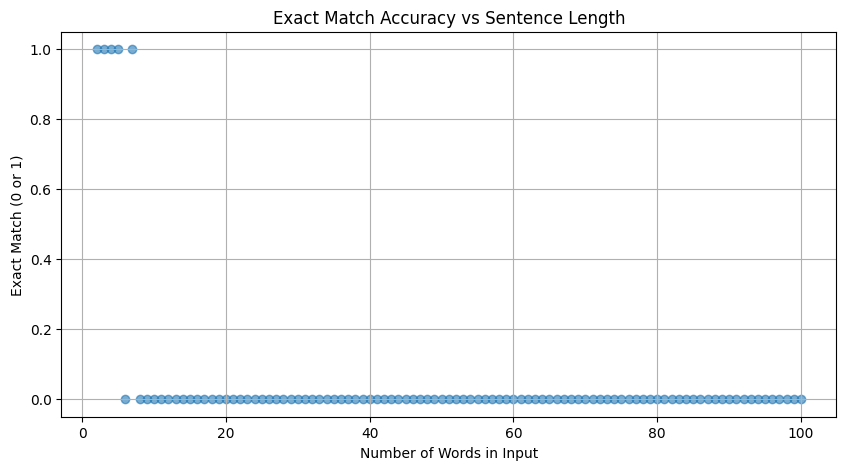

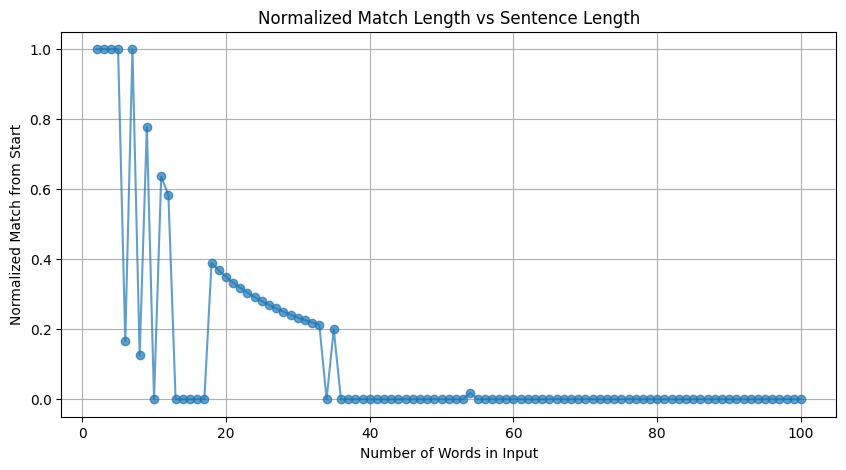

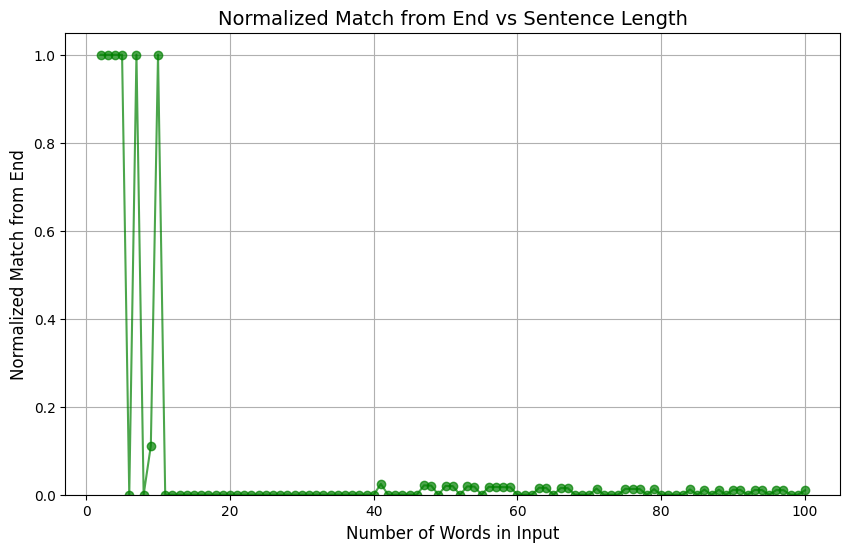

In [76]:
data = evaluate_and_plot(data)

#### Prompt 2



In [50]:
prompt2 = """
Q: University Ocean
A: yn

Now, perform the same task on the following:"""

In [52]:
data = df
data2 = iterate_llm_through_samples(data2, prompt)
data2


,input,output_true,output_llm
0,Pepsi Audi,ii,i
1,Pepsi Audi Google,iie,iea
2,Pepsi Audi Google parrot,iiet,r
3,Pepsi Audi Google parrot Puma,iieta,p
4,Pepsi Audi Google parrot Puma fear,iietar,ea
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,yp
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,yp
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,yp
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,yp


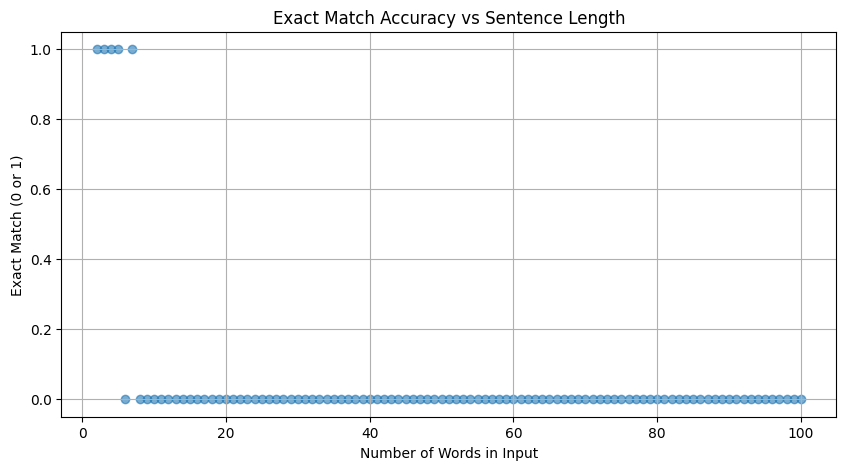

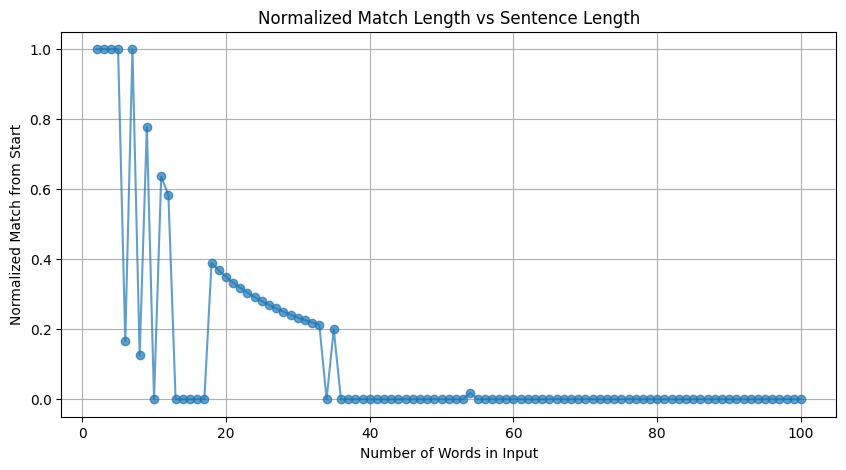

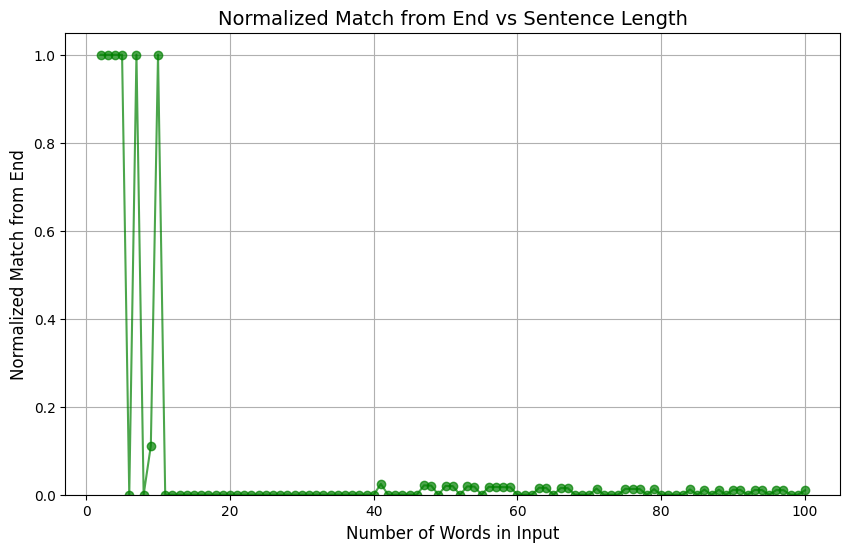

In [77]:
data2 = evaluate_and_plot(data2)

#### Prompt 3

In [53]:
prompt3 = """
Q: Zoom love
A: me

Now, perform the same task on the following:"""

data3 = df
data3 = iterate_llm_through_samples(data3, prompt3)
data3


,input,output_true,output_llm
0,Pepsi Audi,ii,me
1,Pepsi Audi Google,iie,me
2,Pepsi Audi Google parrot,iiet,parrot
3,Pepsi Audi Google parrot Puma,iieta,parrot
4,Pepsi Audi Google parrot Puma fear,iietar,parrot
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,me
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,me
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,me
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,me


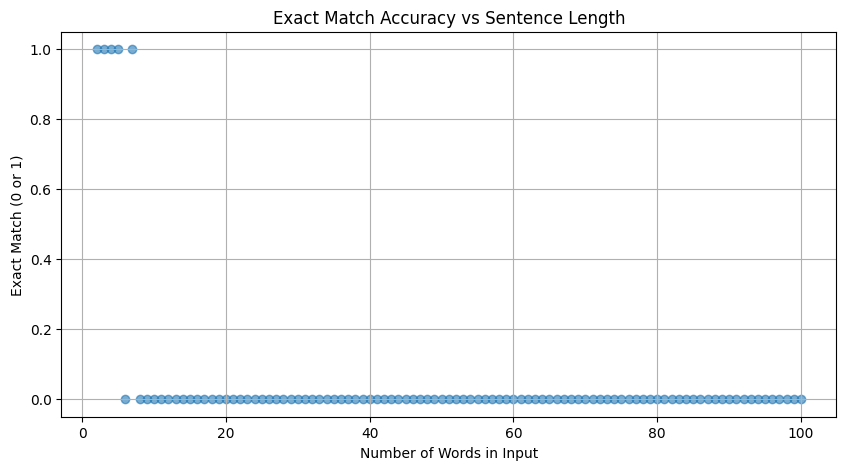

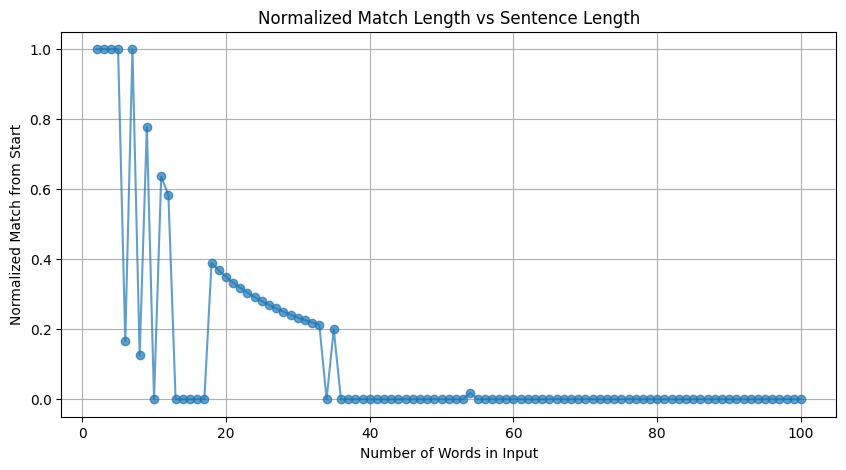

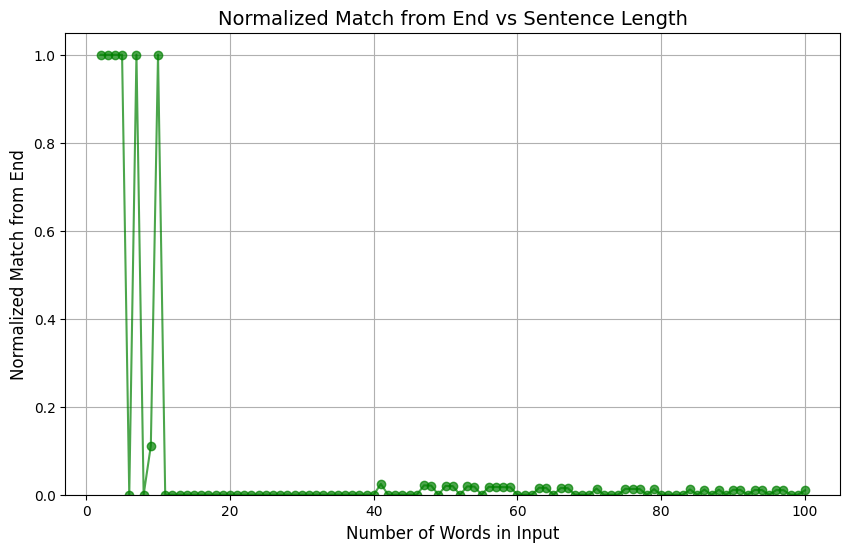

In [78]:
data3 = evaluate_and_plot(data3)

#### Prompt 4


In [54]:

prompt4 = """
Q: Meta Github
A: ab

"""

data4 = df
data4 = iterate_llm_through_samples(data4, prompt4)
data4


,input,output_true,output_llm
0,Pepsi Audi,ii,ea
1,Pepsi Audi Google,iie,pag
2,Pepsi Audi Google parrot,iiet,aag
3,Pepsi Audi Google parrot Puma,iieta,ap
4,Pepsi Audi Google parrot Puma fear,iietar,ab
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,ab
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,ab
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,ab
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,ab


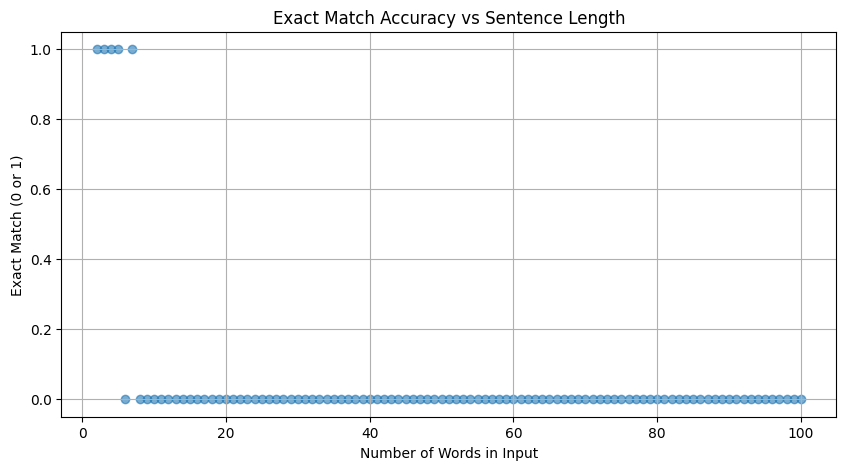

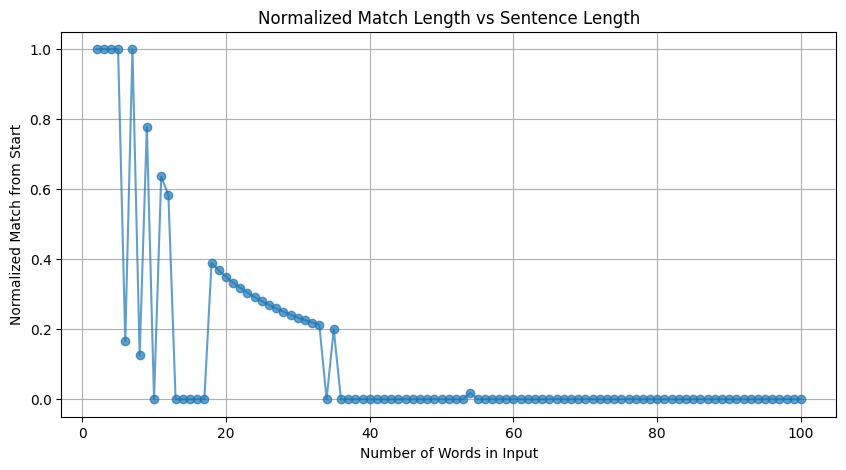

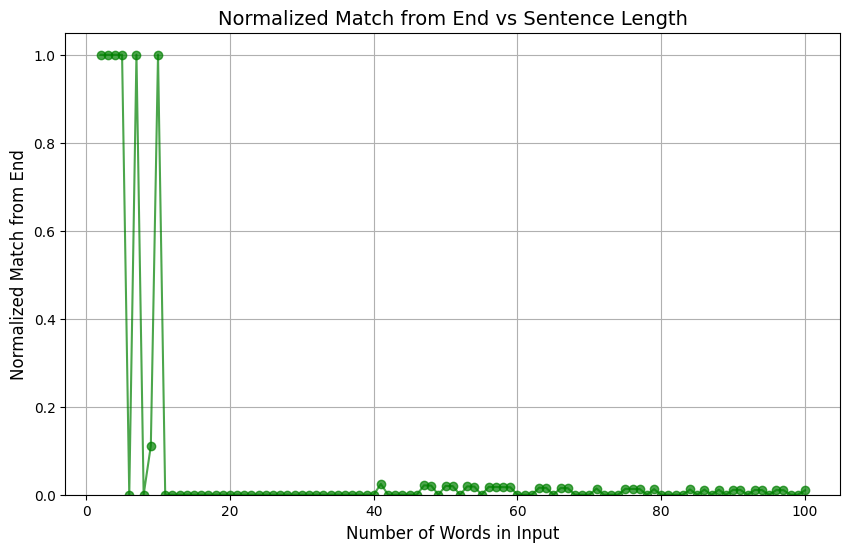

In [79]:
data4 = evaluate_and_plot(data4)

#### Prompt 5 - Adding a description

In [55]:
prompt5 = """

Return the last letter of the input words.

Q: Meta Github
A: ab

Now, perform the same task on the following:
"""

data5 = df
data5 = iterate_llm_through_samples(data5, prompt5)
data5


,input,output_true,output_llm
0,Pepsi Audi,ii,i
1,Pepsi Audi Google,iie,e i e
2,Pepsi Audi Google parrot,iiet,t
3,Pepsi Audi Google parrot Puma,iieta,t i e t a
4,Pepsi Audi Google parrot Puma fear,iietar,er
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,o
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,e


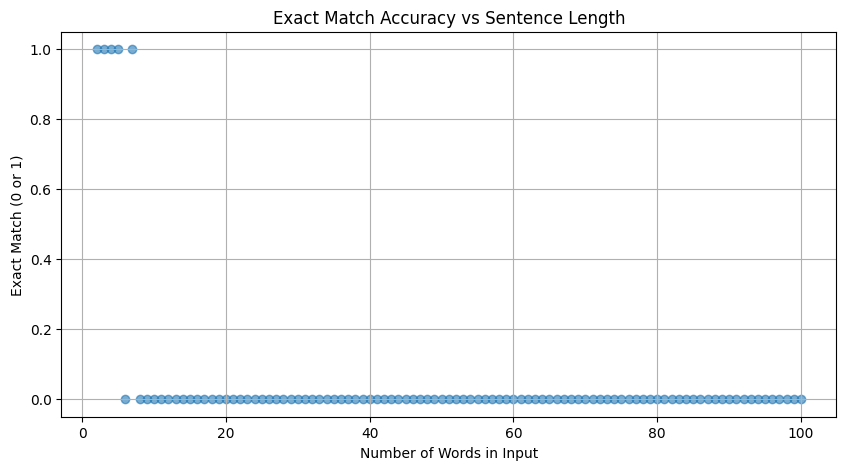

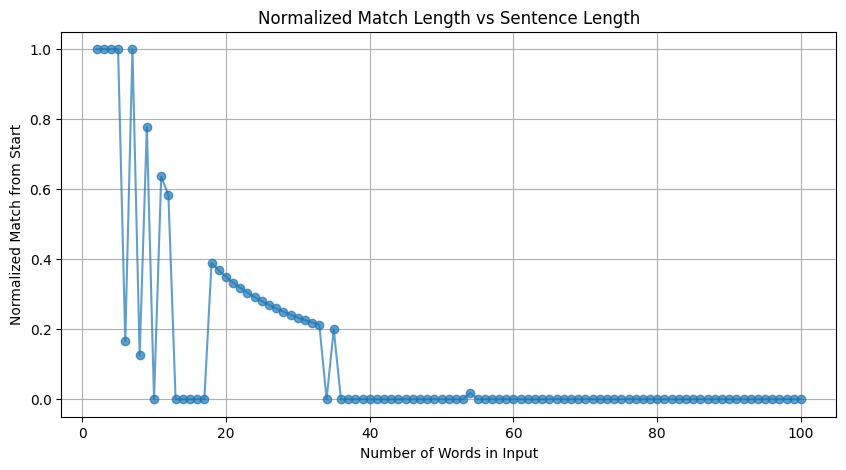

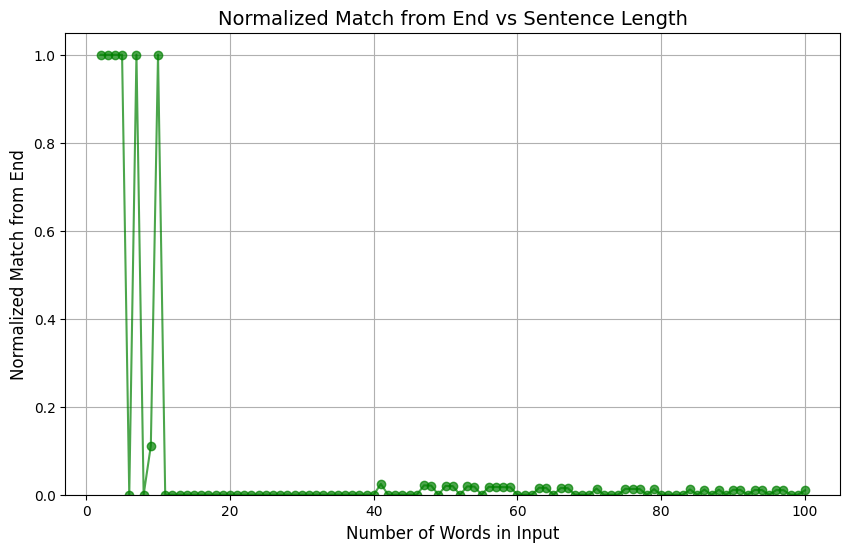

In [80]:
data5 = evaluate_and_plot(data5)

#### Prompt 6 - Using words not in the corpus in the prompt

In [56]:
prompt6 = """

Return the last letter of the input words.

Q: Corgi balloon
A: in

Now, perform the same task on the following:
"""

data6 = df
data6 = iterate_llm_through_samples(data6, prompt6)
data6


,input,output_true,output_llm
0,Pepsi Audi,ii,i
1,Pepsi Audi Google,iie,e
2,Pepsi Audi Google parrot,iiet,t
3,Pepsi Audi Google parrot Puma,iieta,t
4,Pepsi Audi Google parrot Puma fear,iietar,r
...,...,...,...
94,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
95,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,e
96,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,a
97,Pepsi Audi Google parrot Puma fear Uber Master...,iietarrdaotaearriynnynfhaaegeubeteXreoesnoeMmx...,e


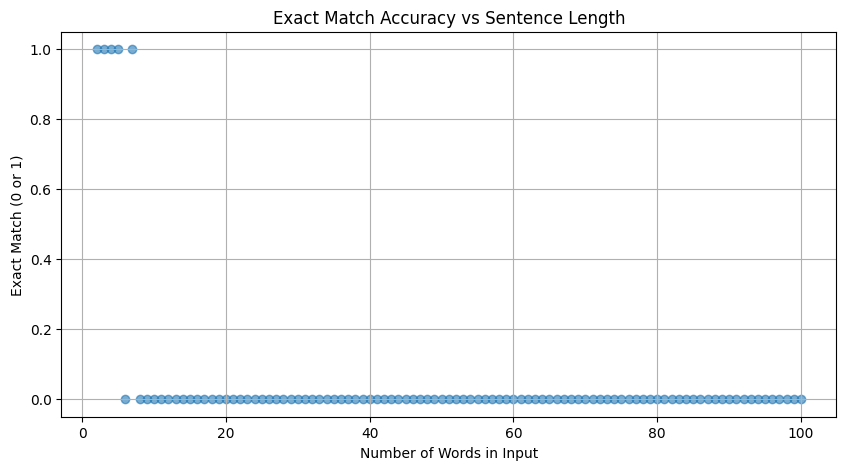

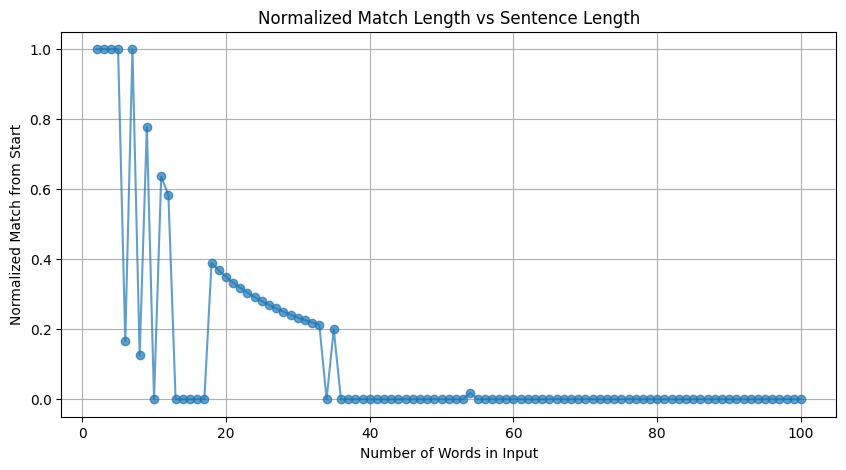

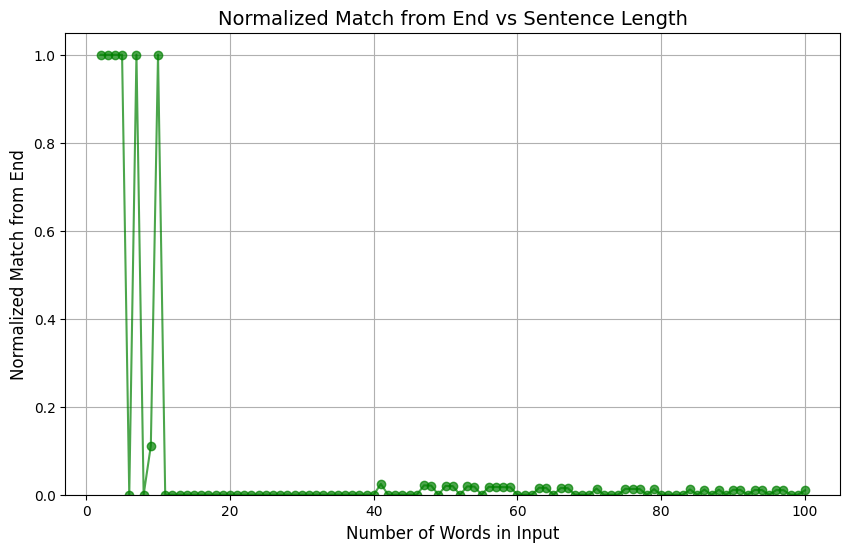

In [81]:
data6 = evaluate_and_plot(data6)

#### Prompt 7 - Modifying the description

In [67]:
prompt7 = """

Return the last letter of each word.

Q: CocaCola Notion
A: an

Now, perform the same task on the following:
"""

data7 = df
data7 = iterate_llm_through_samples(data7, prompt7)
data7


,input,output_true,output_llm
0,CocaCola Notion,an,an
1,CocaCola Notion Dell,anl,ell
2,CocaCola Notion Dell Adidas,anls,a n l s
3,CocaCola Notion Dell Adidas Lenovo,anlso,a n l s o
4,CocaCola Notion Dell Adidas Lenovo Azure,anlsoe,a n l s o e
...,...,...,...
94,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae
95,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae
96,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae
97,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,aeanlnsaeoeeieaoeeieaoeeieaoeei


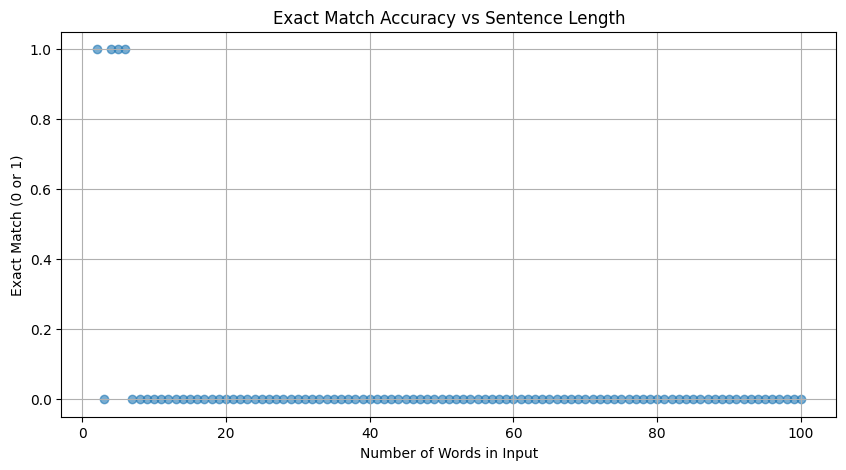

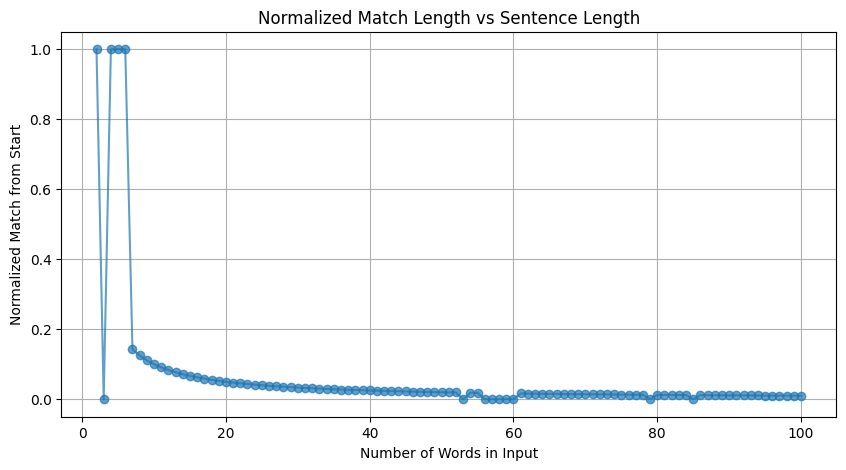

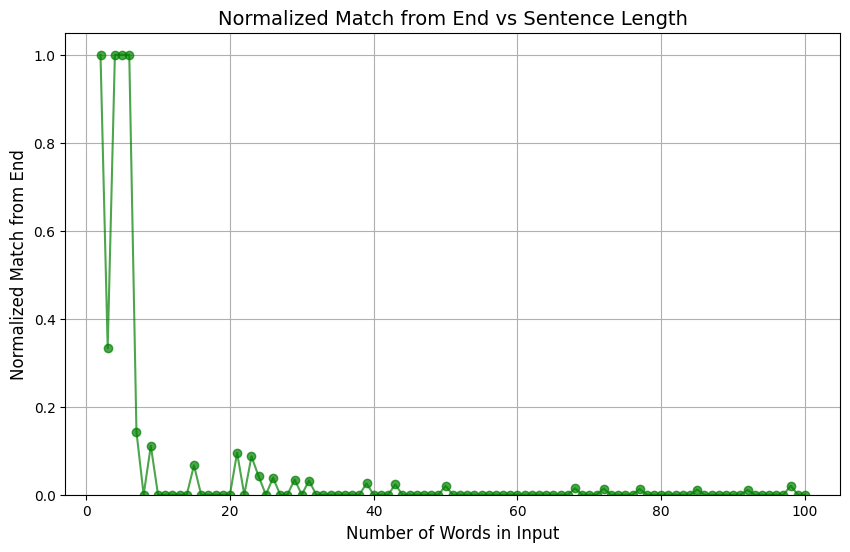

In [82]:
data7 = evaluate_and_plot(data7)

#### Prompt 8 - Modifying the description

In [66]:
prompt8 = """

Return the last letter of each word in the input.

Q: CocaCola Notion
A: an

Now, perform the same task on the following:
"""

data8 = df
data8 = iterate_llm_through_samples(data8, prompt8)
data8


,input,output_true,output_llm
0,CocaCola Notion,an,an
1,CocaCola Notion Dell,anl,ell
2,CocaCola Notion Dell Adidas,anls,a n l s s
3,CocaCola Notion Dell Adidas Lenovo,anlso,aen
4,CocaCola Notion Dell Adidas Lenovo Azure,anlsoe,aenea
...,...,...,...
94,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae as o s e m t e t p
95,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae
96,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae
97,CocaCola Notion Dell Adidas Lenovo Azure Zoom ...,anlsoemtekttdieaeteaeaeeuelreyeilXntnneagreaot...,ae


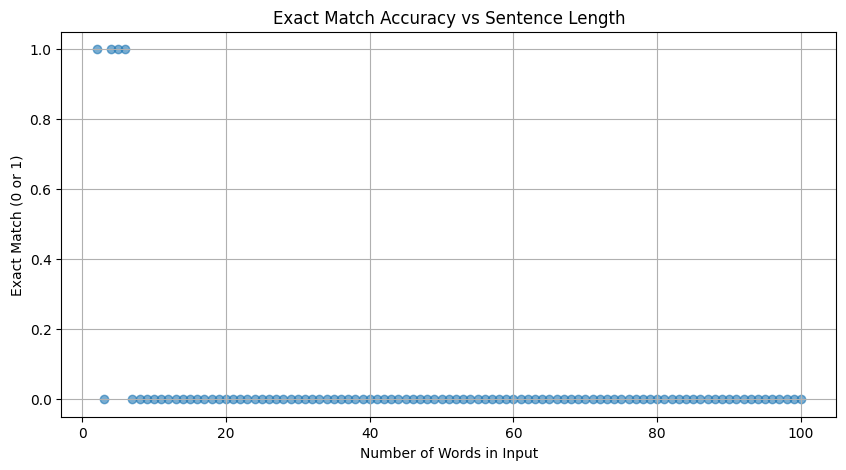

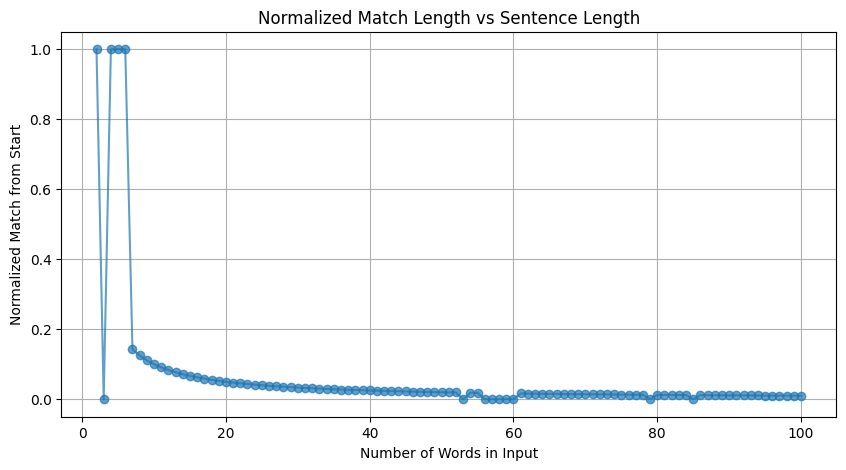

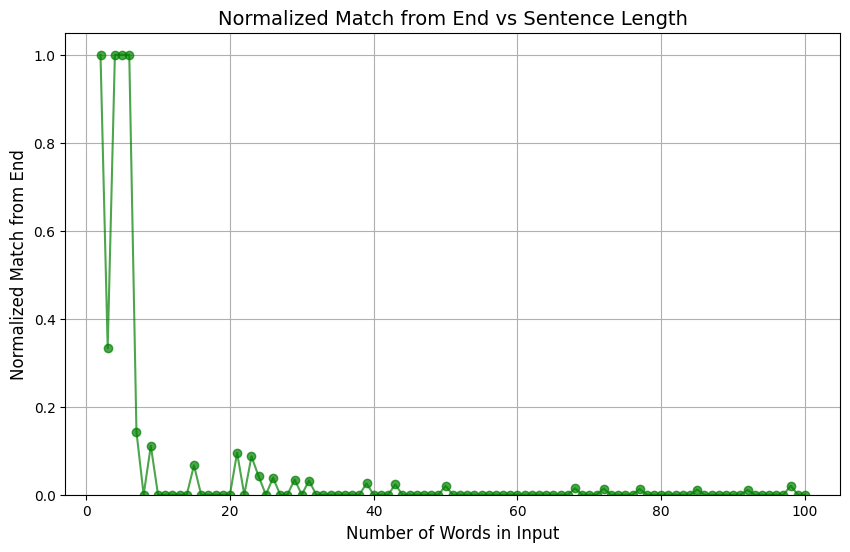

In [83]:
data8 = evaluate_and_plot(data8)

## How to evaluate

1. See if it equals
2. Calculate the length till which it matches - then normalize by total length of the sequence - plot this against length of sentence
 So the x-axis is the length of the sentence and and the y-axis is percentage match